In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
names = ["UnitNo", "cycle", 'Setting1', 'Setting2', 'Setting3','s1','s2','s3','s4','s5', 's6', 's7', 's8', 's9',
         's10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', 's22','s23', 's24', 's25', 's26']

In [3]:
train1 = pd.read_csv("Data/CMAPSSData/train1.csv", sep=' ' ,names=names)
train2 = pd.read_csv("Data/CMAPSSData/train2.csv", sep=' ' ,names=names)
train3 = pd.read_csv("Data/CMAPSSData/train3.csv", sep=' ' ,names=names)
train4 = pd.read_csv("Data/CMAPSSData/train4.csv", sep=' ' ,names=names)
test1 = pd.read_csv("Data/CMAPSSData/test1.csv", sep=' ' ,names=names)
test2 = pd.read_csv("Data/CMAPSSData/test2.csv", sep=' ' ,names=names)
test3 = pd.read_csv("Data/CMAPSSData/test3.csv", sep=' ' ,names=names)
test4 = pd.read_csv("Data/CMAPSSData/test4.csv", sep=' ' ,names=names)

In [4]:
rul1 = pd.read_csv("Data/CMAPSSData/RUL1.csv", names=['RUL'])
rul2 = pd.read_csv("Data/CMAPSSData/RUL2.csv", names=['RUL'])
rul3 = pd.read_csv("Data/CMAPSSData/RUL3.csv", names=['RUL'])
rul4 = pd.read_csv("Data/CMAPSSData/RUL4.csv", names=['RUL'])

In [5]:
train4.tail()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,372,2319,100.0,29.11,17.5234,NaN,NaN,NaN,NaN,NaN
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,396,2388,100.0,39.38,23.7151,NaN,NaN,NaN,NaN,NaN
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,395,2388,100.0,39.78,23.8270,NaN,NaN,NaN,NaN,NaN
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,337,2223,100.0,15.26,9.0774,NaN,NaN,NaN,NaN,NaN
61248,249,255,42.0030,0.8400,100.0,445.00,549.85,1369.75,1147.45,3.91,...,333,2212,100.0,10.66,6.4341,NaN,NaN,NaN,NaN,NaN


In [6]:
rul1.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [7]:
train2.UnitNo.nunique()

260

In [8]:
print(train1.shape)
print(rul1.shape)
print(train2.shape)
print(rul2.shape)
print(train3.shape)
print(rul3.shape)
print(train4.shape)
print(rul4.shape)

(20631, 31)
(100, 1)
(53759, 31)
(259, 1)
(24720, 31)
(100, 1)
(61249, 31)
(248, 1)


In [9]:
test1.shape

(13096, 31)

In [10]:
# train = pd.concat([train1, train2, train3, train4])
# test = pd.concat([test1, test2, test3, test4])
# truth_df = pd.concat([rul1,rul2,rul3,rul4])
train = train2
test = test2
truth_df = rul2

In [11]:
train.head()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,334,2223,100.00,14.73,8.8071,NaN,NaN,NaN,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,330,2212,100.00,10.41,6.2665,NaN,NaN,NaN,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,309,1915,84.93,14.08,8.6723,NaN,NaN,NaN,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,329,2212,100.00,10.59,6.4701,NaN,NaN,NaN,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,309,1915,84.93,14.13,8.5286,NaN,NaN,NaN,NaN,NaN


In [12]:
train.drop(columns=['s22', 's23', 's24', 's25', 's26'], inplace=True)
test.drop(columns=['s22', 's23', 's24', 's25', 's26'], inplace=True)

## Data Preprocessing

In [13]:
# Data Labeling - generate column RUL
rul_train = pd.DataFrame(train.groupby('UnitNo')['cycle'].max()).reset_index()
rul_train.columns = ['UnitNo', 'max']
train = pd.merge(train,rul_train, on='UnitNo', how='left')
train['RUL'] = train['max'] - train['cycle']
train.drop('max', axis=1, inplace=True)
train.head()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144


In [14]:
rul_train.shape

(260, 2)

In [15]:
truth_df.shape

(259, 1)

In [16]:
# generate label columns for training data
w1 = 30
w0 = 15

# Label1 indicates a failure will occur within the next 30 cycles.
# 1 indicates failure, 0 indicates healthy 
train['label1'] = np.where(train['RUL'] <= w1, 1, 0 )

# label2 is multiclass, value 1 is identical to label1,
# value 2 indicates failure within 15 cycles
train['label2'] = train['label1']
train.loc[train['RUL'] <= w0, 'label2'] = 2
train.head()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,148,0,0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,147,0,0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,146,0,0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,145,0,0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,144,0,0


In [17]:
# MinMax normalization
train['Unit_norm'] = train['UnitNo']
cols_normalize = train.columns.difference(['UnitNo', 'cycle', 'RUL', 'label1', 'label2'])
scaler = MinMaxScaler()
norm_train = pd.DataFrame(scaler.fit_transform(train[cols_normalize]), columns=cols_normalize, index=train.index)

join_df = train[train.columns.difference(cols_normalize)].join(norm_train)
train = join_df.reindex(columns=train.columns)
train.head()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,Unit_norm
0,1,1,0.833134,0.997625,1.0,0.060269,0.181576,0.311201,0.273095,0.146592,...,0.0,0.322917,0.651163,1.0,0.156036,0.159082,148,0,0,0.0
1,1,2,0.999767,0.998575,1.0,0.000000,0.131847,0.296600,0.245535,0.000000,...,0.0,0.281250,0.627907,1.0,0.007888,0.014562,147,0,0,0.0
2,1,3,0.595096,0.738480,0.0,0.238089,0.016332,0.035297,0.056997,0.293184,...,0.0,0.062500,0.000000,0.0,0.133745,0.151414,146,0,0,0.0
3,1,4,0.999993,0.999525,1.0,0.000000,0.128269,0.298795,0.246979,0.000000,...,0.0,0.270833,0.627907,1.0,0.014060,0.026144,145,0,0,0.0
4,1,5,0.595137,0.736698,0.0,0.238089,0.014130,0.037871,0.058152,0.293184,...,0.0,0.062500,0.000000,0.0,0.135460,0.143240,144,0,0,0.0


In [18]:
test['Unit_norm'] = test['UnitNo']
norm_test_df = pd.DataFrame(scaler.transform(test[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test.index)
test_join_df = test[test.columns.difference(cols_normalize)].join(norm_test_df)
test = test_join_df.reindex(columns = test.columns)
test = test.reset_index(drop=True)
test.head()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Unit_norm
0,1,1,0.238019,0.297150,1.0,0.597937,0.637673,0.686550,0.676888,0.617180,...,0.993662,0.632503,0.114199,1.0,0.687500,0.854123,1.0,0.625514,0.633951,0.0
1,1,2,0.476162,0.831354,1.0,0.626985,0.663272,0.643289,0.535166,0.507937,...,0.993496,0.487219,0.331283,0.0,0.635417,0.864693,1.0,0.483882,0.500205,0.0
2,1,3,0.833282,0.997625,1.0,0.060269,0.187815,0.312475,0.251745,0.146592,...,0.992477,0.487171,0.370350,0.0,0.312500,0.651163,1.0,0.164609,0.165078,0.0
3,1,4,0.999967,0.998812,1.0,0.000000,0.134324,0.287038,0.250614,0.000000,...,0.992394,0.520160,0.388254,0.0,0.302083,0.627907,1.0,0.005830,0.023186,0.0
4,1,5,0.595089,0.737886,0.0,0.238089,0.010918,0.025599,0.064796,0.293184,...,0.001213,0.041177,0.927248,0.0,0.020833,0.000000,0.0,0.141632,0.145822,0.0


In [19]:
# generate column max for test data
rul_test = pd.DataFrame(test.groupby('UnitNo')['cycle'].max()).reset_index()
rul_test.columns = ['UnitNo', 'max']
truth_df.columns = ['more']
truth_df['UnitNo'] = truth_df.index + 1
truth_df['max'] = rul_test['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

# generate RUL for test data
test = test.merge(truth_df, on=['UnitNo'], how='left')
test['RUL'] = test['max'] - test['cycle']
test.drop('max', axis=1, inplace=True)
test.head()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,Unit_norm,RUL
0,1,1,0.238019,0.297150,1.0,0.597937,0.637673,0.686550,0.676888,0.617180,...,0.632503,0.114199,1.0,0.687500,0.854123,1.0,0.625514,0.633951,0.0,275
1,1,2,0.476162,0.831354,1.0,0.626985,0.663272,0.643289,0.535166,0.507937,...,0.487219,0.331283,0.0,0.635417,0.864693,1.0,0.483882,0.500205,0.0,274
2,1,3,0.833282,0.997625,1.0,0.060269,0.187815,0.312475,0.251745,0.146592,...,0.487171,0.370350,0.0,0.312500,0.651163,1.0,0.164609,0.165078,0.0,273
3,1,4,0.999967,0.998812,1.0,0.000000,0.134324,0.287038,0.250614,0.000000,...,0.520160,0.388254,0.0,0.302083,0.627907,1.0,0.005830,0.023186,0.0,272
4,1,5,0.595089,0.737886,0.0,0.238089,0.010918,0.025599,0.064796,0.293184,...,0.041177,0.927248,0.0,0.020833,0.000000,0.0,0.141632,0.145822,0.0,271


In [20]:
# generate label columns w0 and w1 for test data
test['label1'] = np.where(test['RUL'] <= w1, 1, 0 )
test['label2'] = test['label1']
test.loc[test['RUL'] <= w0, 'label2'] = 2
test.head()

,UnitNo,cycle,Setting1,Setting2,Setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,Unit_norm,RUL,label1,label2
0,1,1,0.238019,0.297150,1.0,0.597937,0.637673,0.686550,0.676888,0.617180,...,1.0,0.687500,0.854123,1.0,0.625514,0.633951,0.0,275,0,0
1,1,2,0.476162,0.831354,1.0,0.626985,0.663272,0.643289,0.535166,0.507937,...,0.0,0.635417,0.864693,1.0,0.483882,0.500205,0.0,274,0,0
2,1,3,0.833282,0.997625,1.0,0.060269,0.187815,0.312475,0.251745,0.146592,...,0.0,0.312500,0.651163,1.0,0.164609,0.165078,0.0,273,0,0
3,1,4,0.999967,0.998812,1.0,0.000000,0.134324,0.287038,0.250614,0.000000,...,0.0,0.302083,0.627907,1.0,0.005830,0.023186,0.0,272,0,0
4,1,5,0.595089,0.737886,0.0,0.238089,0.010918,0.025599,0.064796,0.293184,...,0.0,0.020833,0.000000,0.0,0.141632,0.145822,0.0,271,0,0


In [21]:
train.shape

(53759, 30)

## Modelling

In [22]:
# pick a large window size of 50 cycles
sequence_length = 50

In [23]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [24]:
# pick the feature columns 
sequence_cols = ['Setting1', 'Setting2', 'Setting3', 'Unit_norm']
key_cols = ['UnitNo', 'cycle']
label_cols = ['label1', 'label2', 'RUL']

input_features = test.columns.values.tolist()
sensor_cols = [x for x in input_features if x not in set(key_cols)]
sensor_cols = [x for x in sensor_cols if x not in set(label_cols)]
sensor_cols = [x for x in sensor_cols if x not in set(sequence_cols)]

# The time is sequenced along
# This may be a silly way to get these column names, but it's relatively clear
sequence_cols.extend(sensor_cols)

print(sequence_cols)

['Setting1', 'Setting2', 'Setting3', 'Unit_norm', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [25]:
# generator for the sequences
seq_gen = (list(gen_sequence(train[train['UnitNo']==id], sequence_length, sequence_cols)) 
           for id in train['UnitNo'].unique())

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(40759, 50, 25)

In [26]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [27]:
# generate labels
label_gen = [gen_labels(train[train['UnitNo']==id], sequence_length, ['label1']) 
             for id in train['UnitNo'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(40759, 1)

## LSTM Network

In [28]:
import keras
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from sklearn import datasets
from keras.layers import Dense, Dropout, LSTM, Activation

/home/jaromir/anaconda3/envs/keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
# build the network
# Feature weights
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# LSTM model
model = Sequential()

# The first layer
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=50,
         return_sequences=True))

# Plus a 20% dropout rate
model.add(Dropout(0.2))

model.add(LSTM(
         units=100,
         return_sequences=True))

# Plus a 20% dropout rate
model.add(Dropout(0.2))

# The second layer
model.add(LSTM(
          units=50,
          return_sequences=False))

# Plus a 20% dropout rate
model.add(Dropout(0.2))

# Dense sigmoid layer
model.add(Dense(units=nb_out, activation='sigmoid'))

# With adam optimizer and a binary crossentropy loss. We will opimize for model accuracy.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            15200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total para

In [30]:
%%time
# fit the network
history = model.fit(seq_array, # Training features
          label_array, # Training labels
          epochs=20,   # We'll stop after 10 epochs
          batch_size=200, # 
          validation_split=0.1, # Use 10% of data to evaluate the loss. (val_loss)
            verbose=1, #
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=10,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]) 

Train on 36683 samples, validate on 4076 samples
Epoch 1/20
36683/36683 [==============================] - 30s 829us/step - loss: 0.3980 - acc: 0.8413 - val_loss: 0.2062 - val_acc: 0.9183
Epoch 2/20
36683/36683 [==============================] - 30s 817us/step - loss: 0.2699 - acc: 0.8926 - val_loss: 0.1924 - val_acc: 0.9151
Epoch 3/20
36683/36683 [==============================] - 30s 817us/step - loss: 0.2312 - acc: 0.9062 - val_loss: 0.1804 - val_acc: 0.9284
Epoch 4/20
36683/36683 [==============================] - 30s 820us/step - loss: 0.2114 - acc: 0.9121 - val_loss: 0.1973 - val_acc: 0.9232
Epoch 5/20
36683/36683 [==============================] - 30s 818us/step - loss: 0.2026 - acc: 0.9154 - val_loss: 0.2017 - val_acc: 0.9239
Epoch 6/20
36683/36683 [==============================] - 30s 820us/step - loss: 0.1816 - acc: 0.9242 - val_loss: 0.1639 - val_acc: 0.9311
Epoch 7/20
36683/36683 [==============================] - 30s 817us/step - loss: 0.1775 - acc: 0.9275 - val_loss: 0.2

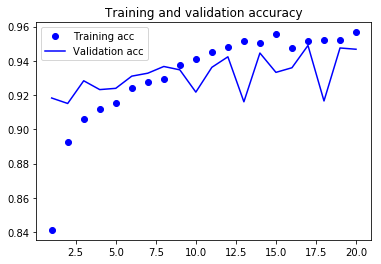

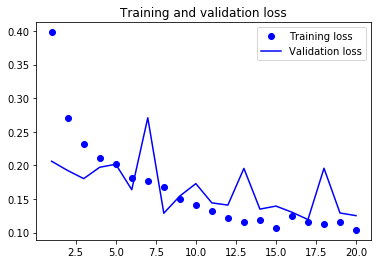

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Training Accurracy: {}'.format(scores[1]))

40759/40759 [==============================] - 11s 276us/step
Training Accurracy: 0.9601805773739281


In [33]:
# make predictions and compute confusion matrix
y_pred = model.predict_classes(seq_array,verbose=1, batch_size=200)
y_true = label_array
print('Training Confusion matrix\n- x-axis is predicted labels.\n- y-axis is true labels')
cm = confusion_matrix(y_true, y_pred)
cm

40759/40759 [==============================] - 11s 276us/step
Training Confusion matrix
- x-axis is predicted labels.
- y-axis is true labels


array([[31757,   942],
       [  681,  7379]])

In [34]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)
print( 'Training Precision: ', precision, '\n', 'Training Recall: ', recall, '\n', 'Training F1 Score:', f1)

Training Precision:  0.8867924528301887 
 Training Recall:  0.9155086848635235 
 Training F1 Score: 0.9009217996459311


## Model testing

In [35]:
test[test['UnitNo']==1][sequence_cols].values[-3:]

array([[5.95253285e-01, 7.36342043e-01, 0.00000000e+00, 0.00000000e+00,
        2.38088774e-01, 1.82585558e-02, 5.24718949e-02, 7.11259808e-02,
        2.93183940e-01, 2.08805031e-01, 9.16424037e-02, 2.55479076e-03,
        4.73050971e-02, 2.70270270e-02, 7.24755700e-02, 8.92073557e-02,
        3.52743407e-03, 1.40476984e-01, 9.68951377e-01, 0.00000000e+00,
        7.29166667e-02, 0.00000000e+00, 0.00000000e+00, 1.39231824e-01,
        1.44821270e-01],
       [9.99923824e-01, 9.97624703e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.35150014e-01, 3.01476365e-01, 2.67606990e-01,
        0.00000000e+00, 6.28930818e-04, 4.00935516e-03, 6.28795237e-01,
        3.12673766e-01, 2.43243243e-01, 5.12214984e-01, 3.24667089e-03,
        9.94956872e-01, 6.57923549e-01, 3.91146749e-01, 0.00000000e+00,
        3.12500000e-01, 6.27906977e-01, 1.00000000e+00, 6.17283951e-03,
        1.59616829e-02],
       [2.38230813e-01, 2.97030879e-01, 1.00000000e+00, 0.00000000e+00,
        5.9793

In [36]:
for id in test['UnitNo'].unique():
    print(id)
    print(len(test[test['UnitNo']==id]))
    print(len(test[test['UnitNo']==id]) >= sequence_length)


1
258
True
2
55
True
3
165
True
4
86
True
5
148
True
6
63
True
7
184
True
8
173
True
9
161
True
10
84
True
11
162
True
12
74
True
13
164
True
14
160
True
15
165
True
16
88
True
17
264
True
18
40
False
19
172
True
20
101
True
21
128
True
22
159
True
23
49
False
24
210
True
25
147
True
26
76
True
27
68
True
28
23
False
29
101
True
30
184
True
31
123
True
32
170
True
33
135
True
34
52
True
35
77
True
36
163
True
37
49
False
38
127
True
39
149
True
40
183
True
41
210
True
42
137
True
43
184
True
44
164
True
45
195
True
46
132
True
47
81
True
48
132
True
49
65
True
50
164
True
51
37
False
52
165
True
53
149
True
54
74
True
55
123
True
56
73
True
57
76
True
58
247
True
59
22
False
60
144
True
61
70
True
62
205
True
63
174
True
64
233
True
65
367
True
66
63
True
67
146
True
68
218
True
69
158
True
70
264
True
71
65
True
72
143
True
73
151
True
74
103
True
75
192
True
76
222
True
77
67
True
78
128
True
79
113
True
80
278
True
81
76
True
82
96
True
83
21
False
84
204
True
85
183
True
86
83
True

In [37]:
seq_array_test_last = [test[test['UnitNo']==id][sequence_cols].values[-sequence_length:] 
                       for id in test['UnitNo'].unique() if len(test[test['UnitNo']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(235, 50, 25)

In [38]:
y_mask = [len(test[test['UnitNo']==id]) >= sequence_length for id in test['UnitNo'].unique()]

In [39]:
test.groupby('UnitNo')['label1'].nth(-1)

UnitNo
1      1
2      0
3      0
4      0
5      1
6      0
7      1
8      0
9      1
10     0
11     1
12     0
13     1
14     1
15     0
16     0
17     0
18     0
19     1
20     0
21     0
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
      ..
230    0
231    1
232    0
233    0
234    0
235    0
236    1
237    0
238    0
239    0
240    0
241    0
242    1
243    0
244    0
245    1
246    0
247    0
248    0
249    0
250    1
251    0
252    1
253    0
254    0
255    0
256    0
257    0
258    0
259    0
Name: label1, Length: 259, dtype: int64

In [40]:
test.groupby('UnitNo')['label1'].nth(-1)[y_mask]

UnitNo
1      1
2      0
3      0
4      0
5      1
6      0
7      1
8      0
9      1
10     0
11     1
12     0
13     1
14     1
15     0
16     0
17     0
19     1
20     0
21     0
22     1
24     0
25     0
26     0
27     0
29     0
30     0
31     0
32     1
33     0
      ..
222    0
225    1
226    0
227    1
229    0
230    0
231    1
232    0
234    0
235    0
236    1
237    0
238    0
239    0
240    0
242    1
245    1
246    0
247    0
248    0
250    1
251    0
252    1
253    0
254    0
255    0
256    0
257    0
258    0
259    0
Name: label1, Length: 235, dtype: int64

In [41]:
label_array_test_last = test.groupby('UnitNo')['label1'].nth(-1)[y_mask].values

In [42]:
label_array_test_last.shape[0]

235

In [43]:
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

print(seq_array_test_last.shape)
print(label_array_test_last.shape)

(235, 50, 25)
(235, 1)


In [44]:
# test metrics
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Test Accurracy: {}'.format(scores_test[1]))

Test Accurracy: 0.9744680863745669


In [45]:
# make predictions and compute confusion matrix
y_pred_test = model.predict_classes(seq_array_test_last)
y_true_test = label_array_test_last
print('Confusion matrix\n- x-axis is predicted labels.\n- y-axis is true labels')
cm = confusion_matrix(y_true_test, y_pred_test)
cm

Confusion matrix
- x-axis is predicted labels.
- y-axis is true labels


array([[170,   4],
       [  2,  59]])

In [46]:
# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Test Precision: ', precision_test, '\n', 'Test Recall: ', recall_test, '\n', 'Test F1 Score:', f1_test)

Test Precision:  0.9365079365079365 
 Test Recall:  0.9672131147540983 
 Test F1 Score: 0.9516129032258064
